Trabajo a desarrollar en el Proyecto

*  Análisis descriptivo de las variables explicativas y el target.
*  Detalle de la división del conjunto de datos en los conjuntos de entrenamiento y test.
*  Algoritmo seleccionado junto con los hiperparámetros escogidos en la modelización.
*  Curva ROC y Área Bajo la Curva para los conjuntos de entrenamiento y test.

## PARTE 1: CARGA DE DATOS

In [47]:
# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

#LIBRERIAS PARA CARGAR DATOS EN COLAB
from google.colab import files
import io

In [48]:
# 2 - CARGA DEL FICHERO DE DATOS
#Cargamos los datos desde local
uploaded = {}
uploaded = files.upload()

Saving ASI_casoPractico.csv to ASI_casoPractico (1).csv


In [49]:
#Leemos el nombre del archivo, por si se carga varias veces.
names = []
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  names.append(fn)

User uploaded file "ASI_casoPractico (1).csv" with length 167523 bytes


In [50]:
#Leemos los datos y tenemos en cuenta que el separador es ';'
data = pd.read_csv(names[0], sep=';')
data = data.drop(["ID","b","e","DR"], axis = 1) #Eliminamos columnas innecesarias
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


## PARTE 2: ANÁLISIS DESCRIPTIVO Y DE CORRELACIONES

In [51]:
# 2 - INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [52]:
# MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERSION
data.describe()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,8.187629,1.570085,0.003293,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,0.221543
std,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,5.628247,2.499229,0.057300,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.415383
min,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,0.000000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,0.000000
25%,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,4.600000,0.000000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,0.000000
50%,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,7.400000,0.000000,0.000000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,0.000000
75%,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,10.800000,3.000000,0.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,0.000000
max,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,50.700000,16.000000,1.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,1.000000


Target
0    1655
1     471
Name: count, dtype: int64


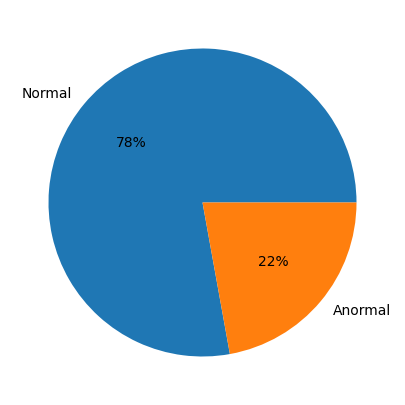

In [53]:
# DISTRIBUCION DE FRECUENCIAS DEL TARGET
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

<Axes: xlabel='Target', ylabel='Count'>

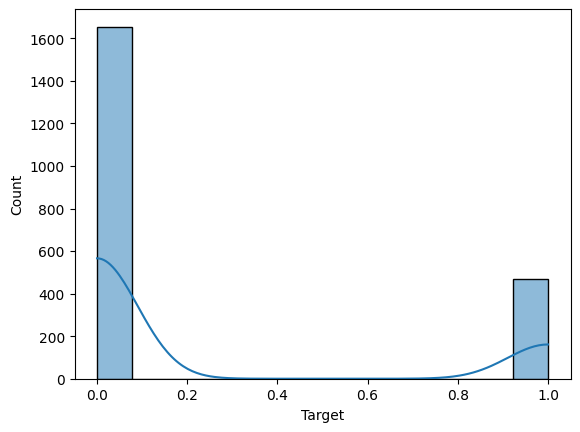

In [54]:
# HISTOGRAMA
sns.histplot(data['Target'], kde=True)

Text(0.5, 1.0, 'Histograma LBE')

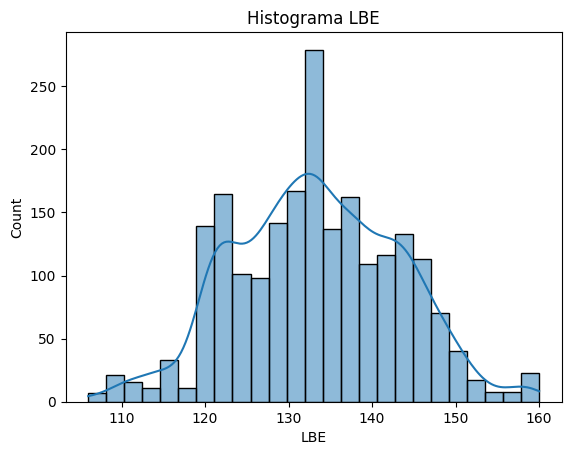

In [55]:
#HISTOGRAMA LBE
sns.histplot(data = data, x = 'LBE', kde= True)
plt.title('Histograma LBE')

Text(0.5, 1.0, 'Histograma Min')

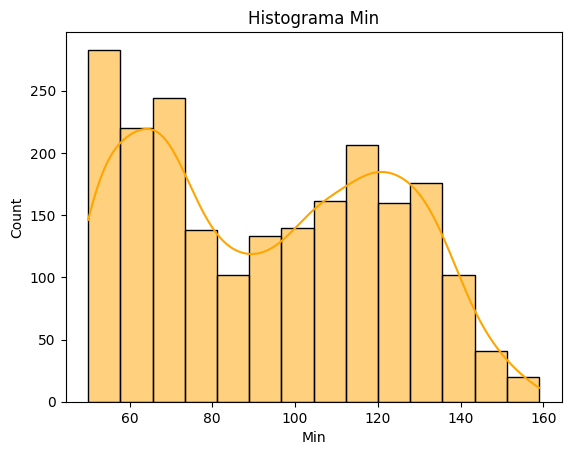

In [56]:
#HISTOGRAMA Min
sns.histplot(data = data, x = 'Min', color = 'orange', kde= True)
plt.title('Histograma Min')

Text(0.5, 1.0, 'Boxplot AC')

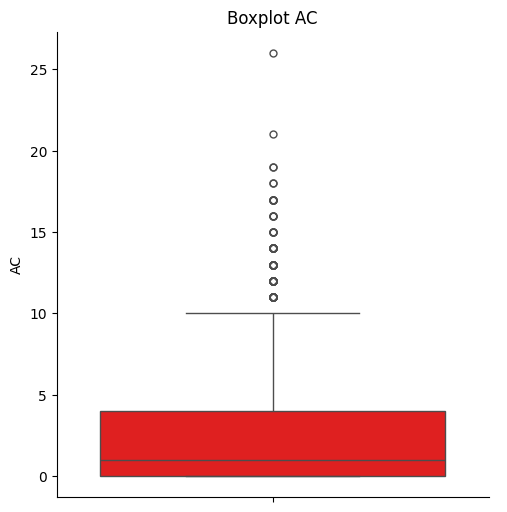

In [57]:
sns.catplot(y= "AC" , kind="box", data=data, color= 'r')
plt.title('Boxplot AC')

Text(0.5, 1.0, 'Boxplot ASTV')

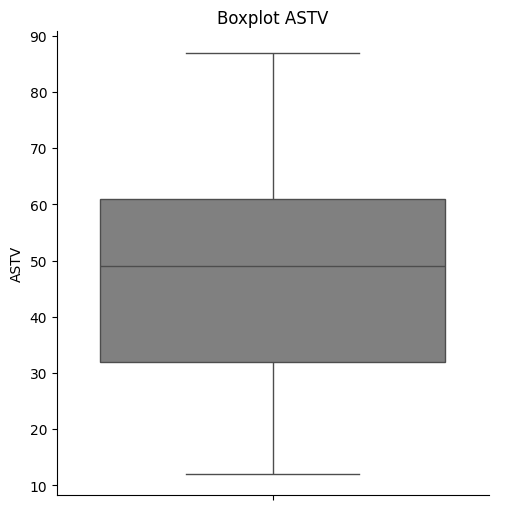

In [58]:
sns.catplot(y= "ASTV" , kind="box", data=data, color= 'grey')
plt.title('Boxplot ASTV')

Text(0.5, 1.0, 'Boxplot Mean')

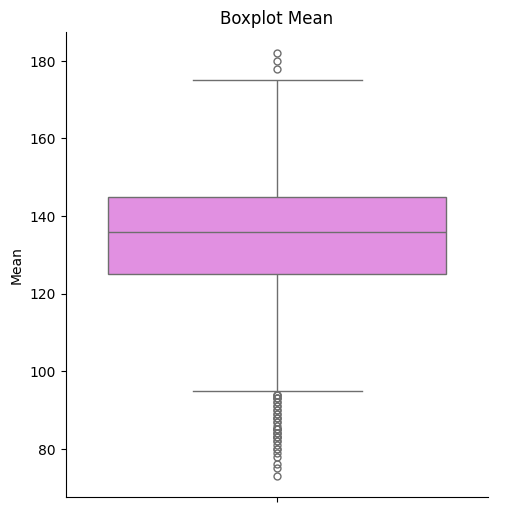

In [59]:
sns.catplot(y= "Mean" , kind="box", data=data, color = 'violet')
plt.title('Boxplot Mean')

In [60]:
#Calculamos la matriz de correlaciones, tomamos la variable 'Target' y ordenamos
data.corr()['Target'].abs().sort_values(ascending=False)

,Target
Target,1.000000
ASTV,0.493391
ALTV,0.489400
AC,0.369470
DP,0.340647
LBE,0.251875
UC,0.213611
MSTV,0.207717
MLTV,0.172519
Min,0.158171


## PARTE 3: GENERACIÓN DE CONJUNTO ENTRENAMIENTO Y TEST

In [61]:
#Importamos librerías para muestreo de datos
from sklearn.model_selection import train_test_split

#Separamos la variable objetivo de las variables explicativas
X_data = data.drop('Target', axis=1)
Y_data = data['Target']

#Creamos los subconjuntos
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(X_data,
                                         Y_data, test_size=0.3, random_state=1)

## PARTE 4: PROBAMOS VERSIONES DE SVC

In [62]:
#Importamos el generador del modelo desce sklearn
from sklearn.svm import SVC

In [63]:
#Importamos la función para crear el Grid
from sklearn.model_selection import GridSearchCV

In [64]:
#Generamos el grid de parámetros a probar
param_grid = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'C' : [0.1, 1 ,10,100], 'degree' : [2,3,4]}]

In [65]:
#Vamos a usar el grid para el modelo SVC
from sklearn.svm import SVC
grid_search = GridSearchCV(
    estimator = SVC(),
    param_grid= param_grid,
    cv= 5,
    n_jobs= -1,
    scoring= 'roc_auc',
    return_train_score= True)

grid_search.fit(X_data_train, Y_data_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='roc_auc')

In [66]:
#Resultados del grid
resultados = pd.DataFrame(grid_search.cv_results_)
resultados[['mean_test_score','mean_train_score','params','rank_test_score']].sort_values('rank_test_score')

,mean_test_score,mean_train_score,params,rank_test_score
7,0.971610,0.993263,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",1
5,0.966972,0.980791,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",2
9,0.963312,0.967740,"{'C': 1, 'kernel': 'linear'}",3
10,0.962817,0.967711,"{'C': 10, 'kernel': 'linear'}",4
4,0.962641,0.999528,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",5
8,0.960962,0.965631,"{'C': 0.1, 'kernel': 'linear'}",6
23,0.959042,0.975930,"{'C': 100, 'degree': 4, 'kernel': 'poly'}",7
11,0.958042,0.965788,"{'C': 100, 'kernel': 'linear'}",8
2,0.957440,0.990923,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",9
22,0.955877,0.971132,"{'C': 100, 'degree': 3, 'kernel': 'poly'}",10


Aunque el modelo que mejor ajusta sea el  {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'} , vemos si comparamos sus resultados con las pruebas en el conjunto de entrenamiento que está sobreajustando, por tanto tomaremos el modelo de kernel lineal, que tiene un resultado ligeramente ingerior en el test, pero no sobreajusta.

In [82]:
#Generamos el modelo con SVC
SVC_model = SVC(probability=True, C= 1, kernel= 'linear') #De esta forma calcula probabilidades
SVC_model.fit(X_data_train, Y_data_train)

SVC(C=1, kernel='linear', probability=True)

In [83]:
#Realizamos la predicción del modelo ajustado
#Solo podemos usar .predict_proba si hemos hecho SVC(probabiliti= True)
Y_SVC_predict_train = SVC_model.predict_proba(X_data_train)
Y_SVC_predict_test = SVC_model.predict_proba(X_data_test)

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score

In [84]:
#Generamos la curva ROC y calculamos el área bajo la curva (AUC) para el SVC

#Conjunto de entrenamiento
fpr_SVC_train, tpr_SVC_train, thresholds_train = roc_curve(Y_data_train, Y_SVC_predict_train[:,1])
roc_SVC_auc_train = auc(fpr_SVC_train, tpr_SVC_train)

#Conjunto de test
fpr_SVC_test, tpr_SVC_test, thresholds_test = roc_curve(Y_data_test, Y_SVC_predict_test[:,1])
roc_SVC_auc_test = auc(fpr_SVC_test, tpr_SVC_test)

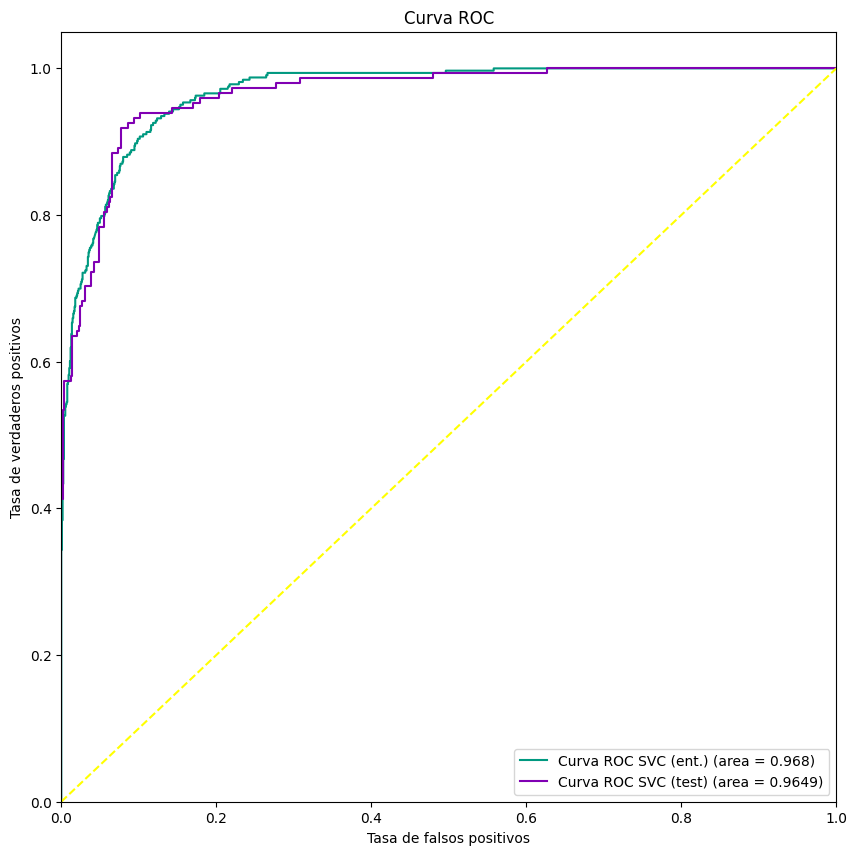

In [85]:
#Creamos la gráfica para representar los valores del SVC (probabilisticos)

plt.figure(figsize=(10,10))

plt.plot(fpr_SVC_train, tpr_SVC_train, color= (0,.6,.5),
         label='Curva ROC SVC (ent.) (area = {})'.format(round(roc_SVC_auc_train,4)))
plt.plot(fpr_SVC_test, tpr_SVC_test, color= (.5,0,.7),
         label='Curva ROC SVC (test) (area = {})'.format(round(roc_SVC_auc_test,4)))
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## PARTE 5 PROBAMOS NAIVE BAYES

In [72]:
#Creamos el modelo de Naive bayes
#La mayoría de variables son continuas, por lo que usaremos el modelo Gaussiano

from sklearn.naive_bayes import GaussianNB

In [73]:
#Definimos la función del modelo y lo entrenamos
modelGNB = GaussianNB()
modelGNB.fit(X_data_train, Y_data_train)

GaussianNB()

In [74]:
#Realizamos la predicción del modelo ajustado
Y_predict_train = modelGNB.predict_proba(X_data_train)
Y_predict_test = modelGNB.predict_proba(X_data_test)

In [75]:
#Generamos la curva ROC y calculamos el área bajo la curva (AUC)

#Conjunto de entrenamiento
fpr_train, tpr_train, thresholds_train = roc_curve(Y_data_train, Y_predict_train[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

#Conjunto de test
fpr_test, tpr_test, thresholds_test = roc_curve(Y_data_test, Y_predict_test[:,1])
roc_auc_test = auc(fpr_test, tpr_test)

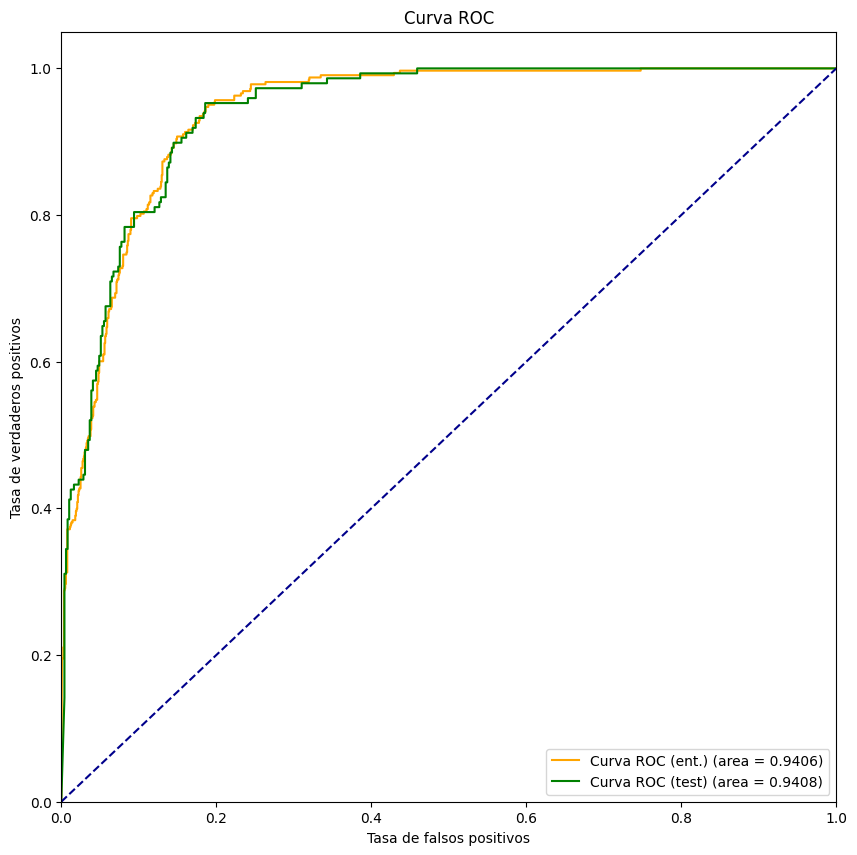

In [76]:
#Creamos la gráfica para representar los valores

plt.figure(figsize=(10,10))

plt.plot(fpr_train, tpr_train, color='orange',
         label='Curva ROC (ent.) (area = {})'.format(round(roc_auc_train,4)))
plt.plot(fpr_test, tpr_test, color='green',
         label='Curva ROC (test) (area = {})'.format(round(roc_auc_test,4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## PARTE 6 COMPARATIVA

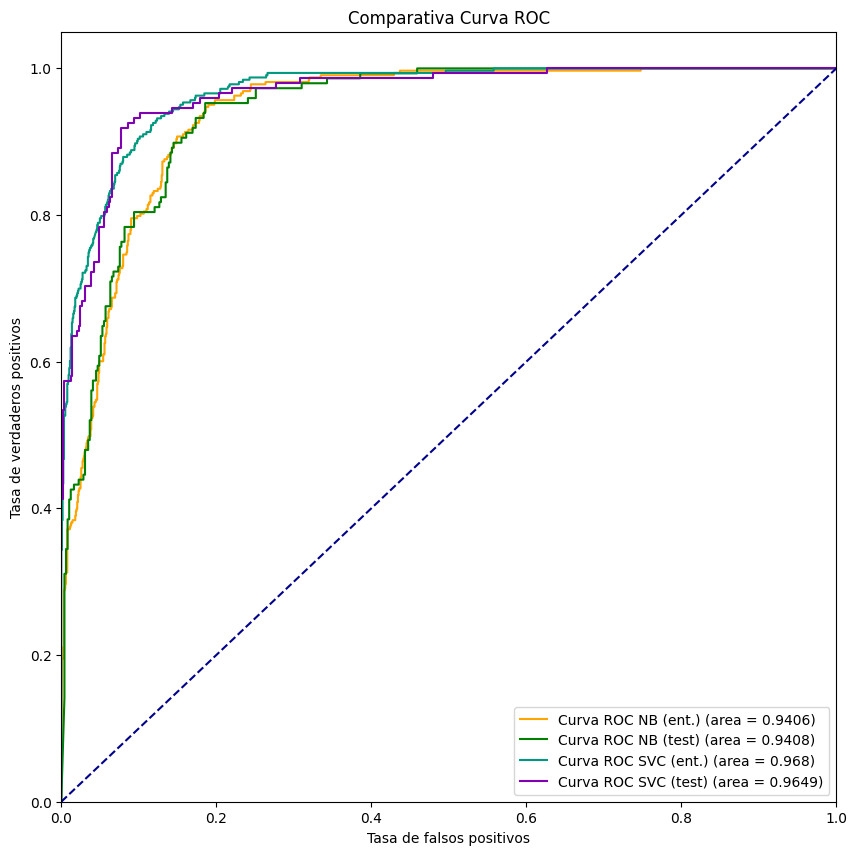

In [86]:
plt.figure(figsize=(10,10))

plt.plot(fpr_train, tpr_train, color='orange',
         label='Curva ROC NB (ent.) (area = {})'.format(round(roc_auc_train,4)))
plt.plot(fpr_test, tpr_test, color='green',
         label='Curva ROC NB (test) (area = {})'.format(round(roc_auc_test,4)))
plt.plot(fpr_SVC_train, tpr_SVC_train, color= (0,.6,.5),
         label='Curva ROC SVC (ent.) (area = {})'.format(round(roc_SVC_auc_train,4)))
plt.plot(fpr_SVC_test, tpr_SVC_test, color= (.5,0,.7),
         label='Curva ROC SVC (test) (area = {})'.format(round(roc_SVC_auc_test,4)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Comparativa Curva ROC')
plt.legend(loc="lower right")

plt.show()

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [79]:
#Vamos a crear la matriz de confusión del SVC
Y2_SVC_predict_test = SVC_model.predict(X_data_test)
mat_confusion = confusion_matrix(Y_data_test, Y2_SVC_predict_test)
mat_confusion

array([[463,  27],
       [ 30, 118]])

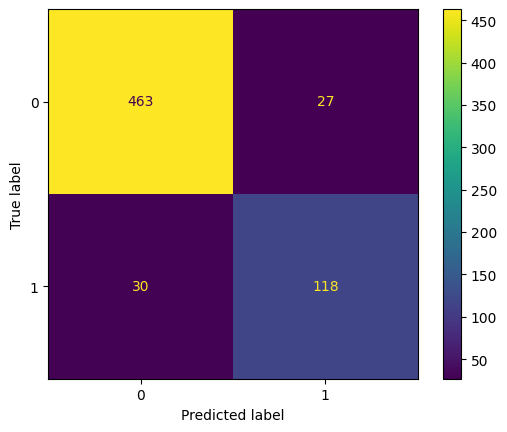

In [87]:
#Graficamos la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=SVC_model.classes_)
disp.plot()

In [89]:
from re import escape
#Comparamos la precisión de NB y SVC
Y2_NB_predict_test = modelGNB.predict(X_data_test)

acc_SVC = accuracy_score(Y_data_test, Y2_SVC_predict_test)
acc_NB = accuracy_score(Y_data_test, Y2_NB_predict_test)

sensibilidad = mat_confusion[1,1] / (mat_confusion[1,0] + mat_confusion[1,1])
especificidad = mat_confusion[0,0] / (mat_confusion[0,0] + mat_confusion[0,1])

print('precisión SVC: ', acc_SVC)
print('precisión NB: ', acc_NB)
print('sensibilidad: ', sensibilidad)
print('especificidad: ', especificidad)



precisión SVC:  0.9106583072100314
precisión NB:  0.8808777429467085
sensibilidad:  0.7972972972972973
especificidad:  0.9448979591836735
